# Solve OpenAI Gym's Taxi-v2 Task

In [90]:
import sys
print("Python %s" % sys.version)
import time, copy, math
from collections import defaultdict

Python 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) 
[GCC 7.3.0]


In [2]:
import gym
print("OpenAI Gym %s" % gym.__version__)

OpenAI Gym 0.14.0


In [3]:
import numpy as np
print("NumPy %s" % np.__version__)

NumPy 1.16.4


In [4]:
import matplotlib
print("matplotlib %s" % matplotlib.__version__)

import matplotlib.pyplot as plt
%matplotlib inline

matplotlib 2.2.2


In [5]:
from monitor import interact

Use the code cell below to create an instance of the [Taxi](https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py) environment.

In [6]:
env = gym.make('Taxi-v2')

In [7]:
env

<TimeLimit<TaxiEnv<Taxi-v2>>>

In [13]:
class Agent:

    def __init__(self, nA=6, alpha=0.01, gamma=1.0, epsilon=0.005):
        """ Initialize agent.

        Params
        ======
        - nA: number of actions available to the agent
        """
        self.nA = nA
        self.Q = defaultdict(lambda: np.zeros(self.nA))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        
    def _generate_policy_from_epsilon_greedy(self, state):
        # else
        policy = np.ones(self.nA) * (self.epsilon / self.nA)
        # if a maximizes Q(s,a)
        max_action = np.argmax(self.Q[state])
        policy[max_action] += (1 - self.epsilon)
        return policy
    
    def _generate_action_from_policy(self, policy):
        max_q = float(sum(policy))
        probs = [q / max_q for q in policy]
        action = np.random.choice(np.arange(self.nA), p=probs)
        return action

    def select_action(self, state):
        """ Given the state, select an action.

        Params
        ======
        - state: the current state of the environment

        Returns
        =======
        - action: an integer, compatible with the task's action space
        """
        policy = self._generate_policy_from_epsilon_greedy(state)
        action = self._generate_action_from_policy(policy)
        return action

    def step(self, state, action, reward, next_state, done):
        """ Update the agent's knowledge, using the most recently sampled tuple.

        Params
        ======
        - state: the previous state of the environment
        - action: the agent's previous choice of action
        - reward: last reward received
        - next_state: the current state of the environment
        - done: whether the episode is complete (True or False)
        """
        self.Q[state][action] += self.alpha * (reward +
                                               (self.gamma * max(self.Q[next_state])) - 
                                               self.Q[state][action])

## Perform Exploration

Nomad agent with high learning rate to perform exploration.

In [62]:
agent_nomad = Agent()

agent_nomad.alpha = 0.1
agent_nomad.gamma = 1.0
agent_nomad.epsilon = 0.005
num_episodes = 2500
tic = time.time()
avg_rewards, best_avg_reward = interact(env, agent_nomad, num_episodes=num_episodes)
toc = time.time()
print('\n\nRuntime %d seconds' % int(toc-tic))

Episode 2500/2500 || Best average reward 8.8732



Runtime 5 seconds


Run the above until last average reward bigger than 8.0.

In [63]:
avg_rewards[-1]

8.36

Text(0,0.5,'Average Rewards during Episode')

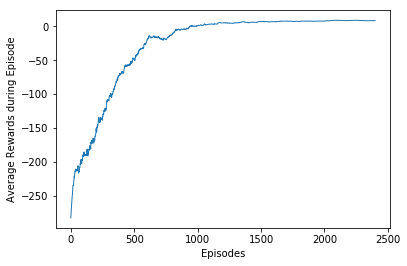

In [64]:
plt.plot(avg_rewards, linewidth=1)
plt.xlabel('Episodes')
plt.ylabel('Average Rewards during Episode')

## Perform Exploitation

Settler agent with lower learning rate to perform exploitation.

In [93]:
agent_settler = copy.deepcopy(agent_nomad)

agent_settler.alpha = 0.001
agent_settler.gamma = 1.0
agent_settler.epsilon = 0.00005
num_episodes = 5000
tic = time.time()
avg_rewards, best_avg_reward = interact(env, agent_settler, num_episodes=num_episodes)
toc = time.time()
print('\n\nRuntime %d seconds' % int(toc-tic))

Episode 5000/5000 || Best average reward 9.27



Runtime 5 seconds


Text(0,0.5,'Average Rewards during Episode')

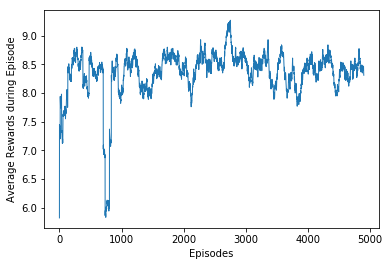

In [94]:
plt.plot(avg_rewards, linewidth=1)
plt.xlabel('Episodes')
plt.ylabel('Average Rewards during Episode')

## Perform Generations of Exploration and Exploitation

In [100]:
num_generations = 100
best_avg_reward_gen = -math.inf

for i_generation in range(num_generations):
    print("Generation %d" % i_generation)
    # nomad
    agent = Agent()
    agent.alpha = 0.1
    agent.gamma = 1.0
    agent.epsilon = 0.005
    num_episodes = 2500
    avg_rewards, best_avg_reward = interact(env, agent, num_episodes=num_episodes)
    # settler
    agent.alpha = 0.001
    agent.gamma = 1.0
    agent.epsilon = 0.00005
    num_episodes = 5000
    avg_rewards, best_avg_reward = interact(env, agent, num_episodes=num_episodes)
    # get best average reward per generation
    if best_avg_reward > best_avg_reward_gen:
        best_avg_reward_gen = best_avg_reward

Generation 0
Episode 2500/2500 || Best average reward 8.6248

Episode 5000/5000 || Best average reward 9.16

Generation 1
Episode 2500/2500 || Best average reward 8.7672

Episode 5000/5000 || Best average reward 9.08

Generation 2
Episode 2500/2500 || Best average reward 8.5254

Episode 5000/5000 || Best average reward 9.29

Generation 3
Episode 2500/2500 || Best average reward 8.8648

Episode 5000/5000 || Best average reward 9.25

Generation 4
Episode 2500/2500 || Best average reward 8.6734

Episode 5000/5000 || Best average reward 9.14

Generation 5
Episode 2500/2500 || Best average reward 8.2629

Episode 5000/5000 || Best average reward 9.15

Generation 6
Episode 2500/2500 || Best average reward 8.5488

Episode 5000/5000 || Best average reward 9.04

Generation 7
Episode 2500/2500 || Best average reward 8.3483

Episode 5000/5000 || Best average reward 9.11

Generation 8
Episode 2500/2500 || Best average reward 8.7616

Episode 5000/5000 || Best average reward 9.44

Generation 9
Episod

Episode 5000/5000 || Best average reward 9.39

Generation 75
Episode 2500/2500 || Best average reward 8.5423

Episode 5000/5000 || Best average reward 9.2

Generation 76
Episode 2500/2500 || Best average reward 8.3592

Episode 5000/5000 || Best average reward 9.25

Generation 77
Episode 2500/2500 || Best average reward 8.4959

Episode 5000/5000 || Best average reward 9.48

Generation 78
Episode 2500/2500 || Best average reward 8.4177

Episode 5000/5000 || Best average reward 9.29

Generation 79
Episode 2500/2500 || Best average reward 8.5476

Episode 5000/5000 || Best average reward 9.25

Generation 80
Episode 2500/2500 || Best average reward 8.8886

Episode 5000/5000 || Best average reward 9.19

Generation 81
Episode 2500/2500 || Best average reward 8.4684

Episode 5000/5000 || Best average reward 9.22

Generation 82
Episode 2500/2500 || Best average reward 8.5635

Episode 5000/5000 || Best average reward 9.33

Generation 83
Episode 2500/2500 || Best average reward 8.9847

Episode 500

In [101]:
best_avg_reward_gen

9.5

In [102]:
best_avg_reward_gen > 9.1

True